# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:.3f}'.format

# Ingest Data  

In [167]:
df0 = pd.read_excel("World military power.xlsx")

In [168]:
df = df0.copy()

In [169]:
df.head()

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.344,Afghanistan,260.000,Afghanistan,0.000,Afghanistan,25.000,Afghanistan,30.000,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.000,Afghanistan,1200.000,Afghanistan,5987.000
2,Albania,2.314,Albania,19.000,Albania,0.000,Albania,0.000,Albania,0.000,...,Albania,"30,57,220",Albania,28748.000,Albania,362.000,Albania,41.000,Albania,691.000
3,Algeria,0.466,Algeria,551.000,Algeria,103.000,Algeria,22.000,Algeria,59.000,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.000,Algeria,0.000,Algeria,6734.000
4,Angola,0.838,Angola,295.000,Angola,72.000,Angola,18.000,Angola,30.000,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.000,Angola,1300.000,Angola,5369.000


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   2020 ranking       139 non-null    object
 1   Unnamed: 1         139 non-null    object
 2   Airforce Strength  139 non-null    object
 3   Unnamed: 3         139 non-null    object
 4   Unnamed: 4         139 non-null    object
 5   Unnamed: 5         139 non-null    object
 6   Unnamed: 6         139 non-null    object
 7   Unnamed: 7         139 non-null    object
 8   Unnamed: 8         139 non-null    object
 9   Unnamed: 9         139 non-null    object
 10  Unnamed: 10        139 non-null    object
 11  Unnamed: 11        139 non-null    object
 12  Unnamed: 12        139 non-null    object
 13  Unnamed: 13        139 non-null    object
 14  Unnamed: 14        139 non-null    object
 15  Unnamed: 15        139 non-null    object
 16  Land Strength      139 non-null    object
 1

In [171]:
df.shape

(139, 60)

In [172]:
df.iloc[:, 2:16]

,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value
1,Afghanistan,260.000,Afghanistan,0.000,Afghanistan,25.000,Afghanistan,30.000,Afghanistan,0.000,Afghanistan,187.000,Afghanistan,0.000
2,Albania,19.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,19.000,Albania,0.000
3,Algeria,551.000,Algeria,103.000,Algeria,22.000,Algeria,59.000,Algeria,87.000,Algeria,257.000,Algeria,45.000
4,Angola,295.000,Angola,72.000,Angola,18.000,Angola,30.000,Angola,47.000,Angola,126.000,Angola,15.000
5,Argentina,227.000,Argentina,24.000,Argentina,7.000,Argentina,9.000,Argentina,64.000,Argentina,100.000,Argentina,0.000
6,Armenia,64.000,Armenia,0.000,Armenia,9.000,Armenia,3.000,Armenia,13.000,Armenia,37.000,Armenia,20.000
7,Australia,464.000,Australia,82.000,Australia,6.000,Australia,38.000,Australia,174.000,Australia,133.000,Australia,22.000
8,Austria,120.000,Austria,15.000,Austria,0.000,Austria,11.000,Austria,32.000,Austria,62.000,Austria,0.000
9,Azerbaijan,147.000,Azerbaijan,17.000,Azerbaijan,12.000,Azerbaijan,1.000,Azerbaijan,29.000,Azerbaijan,88.000,Azerbaijan,17.000


In [173]:
df["Land Strength"].head()

0    Tank Strength
1      Afghanistan
2          Albania
3          Algeria
4           Angola
Name: Land Strength, dtype: object

In [174]:
df["Navy Strength"].head()

0    Navy Fleet Strengths
1             Afghanistan
2                 Albania
3                 Algeria
4                  Angola
Name: Navy Strength, dtype: object

# EDA

In [175]:
df.shape

(139, 60)

## Convert multi index columns to one level

In [176]:
df = df.rename(columns=df.iloc[0, :])


In [177]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.344,Afghanistan,260.000,Afghanistan,0.000,Afghanistan,25.000,Afghanistan,30.000,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.000,Afghanistan,1200.000,Afghanistan,5987.000
2,Albania,2.314,Albania,19.000,Albania,0.000,Albania,0.000,Albania,0.000,...,Albania,"30,57,220",Albania,28748.000,Albania,362.000,Albania,41.000,Albania,691.000
3,Algeria,0.466,Algeria,551.000,Algeria,103.000,Algeria,22.000,Algeria,59.000,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.000,Algeria,0.000,Algeria,6734.000
4,Angola,0.838,Angola,295.000,Angola,72.000,Angola,18.000,Angola,30.000,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.000,Angola,1300.000,Angola,5369.000


i will drop repeated columns

In [178]:
df.drop(index=0, inplace=True)

In [179]:
dropp = []
for i in df.columns[1:]:
    if df[i].values.any() == df['Military Strength'].values.any():
        dropp.append(i)

In [180]:
df.drop(dropp, axis=1, inplace=True)

i will replace , with nothing so that i will have correct data

In [181]:
df.replace(",", "", regex=True, inplace=True)

In [182]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,...,43.000,0.000,5500.000,0.000,14325743,34940837,652230,0.000,1200.000,5987.000
2,Albania,2.314,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,...,4.000,16000.000,42500.000,168300000,1519438,3057220,28748.000,362.000,41.000,691.000
3,Algeria,0.466,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,...,157.000,1306000,325000,12200000000,20741263,41657488,2381741,998.000,0.000,6734.000
4,Angola,0.838,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,...,176.000,1666000,82300.000,8273000000,6244205,30355880,1246700,1600.000,1300.000,5369.000
5,Argentina,0.652,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,...,1138.000,479400,685000,2185000000,20179430,44694198,2780400,4989.000,11000.000,11968.000


all rows are numeric type except Military Strength

## Implement basic steps to see how is your data looks like

In [183]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength value', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value',
       'Total Square Land Area value', 'Total Coastli

## Detect and drop duplicated columns

In [184]:
df.duplicated().value_counts()

False    138
dtype: int64

there arent any duplicates

## Check for missing values 

In [185]:
df.isnull().sum()

Military Strength                           0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value              

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [186]:
miss_val = []

[miss_val.append(column) for column in df.columns if any(df[column].isnull())]

print("Columns that have missing values :")

miss_val

Columns that have missing values :


['Navy Fleet Strengths value',
 'Aircraft Carrier Fleet Strength value',
 'Submarine Fleet Strength value',
 'Destroyer Fleet Strength value',
 'Frigate Fleet Strength value',
 'Total Coastline Coverage value',
 'Total Border Coverage value']

In [187]:
df[df["Navy Fleet Strengths value"]==0]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.344,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,...,43.000,0.000,5500.000,0.000,14325743,34940837,652230,0.000,1200.000,5987.000
6,Armenia,2.125,64.000,0.000,9.000,3.000,13.000,37.000,20.000,110.000,...,11.000,0.000,47500.000,0.000,1696085,3038217,29743.000,NaN,0.000,1570.000
8,Austria,0.957,120.000,15.000,0.000,11.000,32.000,62.000,0.000,56.000,...,52.000,14260.000,215000,43000000,4017691,8793370,83871.000,NaN,0.000,2524.000
12,Belarus,0.818,202.000,39.000,68.000,4.000,28.000,63.000,21.000,532.000,...,65.000,32000.000,190000,198000000,4982905,9527543,207600,NaN,2500.000,3599.000
14,Bhutan,10.168,2.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,...,2.000,0.000,2000.000,0.000,176808,766397,38394.000,NaN,0.000,1136.000
16,Bosnia and Herzegovina,3.859,19.000,0.000,0.000,0.000,0.000,19.000,0.000,320.000,...,24.000,0.000,32500.000,0.000,2394632,3849891,51197.000,20.000,0.000,1543.000
67,Liberia,5.574,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,29.000,0.000,4500.000,0.000,2226923,4809768,111369,579.000,0.000,1667.000
107,Slovakia,0.847,47.000,10.000,0.000,7.000,8.000,21.000,0.000,20.000,...,35.000,200.000,82000.000,9000000,2776970,5445040,49035.000,NaN,172.000,1587.000
112,South Sudan,2.350,19.000,0.000,0.000,2.000,0.000,17.000,6.000,110.000,...,85.000,150200,60000.000,3750000000,5245155,10204581,644329,NaN,0.000,6018.000
118,Switzerland,0.526,169.000,54.000,0.000,18.000,54.000,42.000,0.000,326.000,...,63.000,0.000,260000,0.000,3632250,8292809,41277.000,NaN,1299.000,1770.000


Navy

In [188]:
df['Navy Fleet Strengths value'].mean()

84.98387096774194

In [189]:
df['Navy Fleet Strengths value'].fillna(df['Navy Fleet Strengths value'].mean(), inplace=True)

In [190]:
df['Navy Fleet Strengths value'].isnull().sum()

0

Aircraft

In [191]:
df['Aircraft Carrier Fleet Strength value'].isnull().sum()

23

In [192]:
df['Aircraft Carrier Fleet Strength value'].describe()

count   115.000
mean      0.383
std       1.972
min       0.000
25%       0.000
50%       0.000
75%       0.000
max      20.000
Name: Aircraft Carrier Fleet Strength value, dtype: float64

In [193]:
df['Aircraft Carrier Fleet Strength value'].unique()

array([ 0., nan,  2.,  4.,  1., 20.])

In [194]:
df['Aircraft Carrier Fleet Strength value'].fillna(0, inplace=True)

In [195]:
df['Aircraft Carrier Fleet Strength value'].unique()

array([ 0.,  2.,  4.,  1., 20.])

Submarine

In [196]:
df['Submarine Fleet Strength value'].isnull().sum()

23

In [197]:
df['Submarine Fleet Strength value'].unique()

array([ 0.,  6.,  2., nan,  4., 74., 11.,  8.,  9., 16.,  5., 34., 20.,
        1., 83.,  3., 62., 22., 12., 10., 66.])

In [198]:
df['Submarine Fleet Strength value'].fillna(0, inplace=True)

In [199]:
df['Submarine Fleet Strength value'].isnull().sum()

0

Destroyer

In [200]:
df['Destroyer Fleet Strength value'].isnull().sum()

23

In [201]:
df['Destroyer Fleet Strength value'].unique()

array([ 0.,  4., nan,  2., 36., 11., 10., 40., 16., 12.,  6., 91.])

In [202]:
df['Destroyer Fleet Strength value'].fillna(0, inplace=True)

In [203]:
df['Destroyer Fleet Strength value'].isnull().sum()

0

Frigate

In [204]:
df['Frigate Fleet Strength value'].isnull().sum()

23

In [205]:
df['Frigate Fleet Strength value'].unique()

array([ 0.,  5., nan,  8.,  1.,  2.,  7.,  4., 12., 10., 52.,  9., 11.,
       13.,  6.,  3., 18., 22., 16.])

In [206]:
df['Frigate Fleet Strength value'].fillna(0, inplace=True)

Coastline

In [207]:
df['Total Coastline Coverage value'].unique()

array([0.0, 362.0, 998.0, 1600.0, 4989.0, nan, 25760.0, 713.0, 161.0,
       580.0, 67.0, 20.0, 7491.0, 354.0, 443.0, 400.0, '202080', 6435.0,
       14500.0, 3208.0, 5835.0, 3735.0, 37.0, 7314.0, 1288.0, 2237.0,
       2450.0, 307.0, 3794.0, 1250.0, 4853.0, 885.0, 310.0, 2389.0, 539.0,
       13676.0, 832.0, 7000.0, 54716.0, 2440.0, 58.0, 1448.0, 273.0,
       7600.0, 515.0, 29751.0, 26.0, 536.0, 499.0, 498.0, 225.0, 579.0,
       1770.0, 90.0, 4828.0, 4675.0, 754.0, 9330.0, 294.0, 1835.0, 2470.0,
       1930.0, 1572.0, 451.0, 15134.0, 910.0, 853.0, 2495.0, 25148.0,
       2092.0, 1046.0, 2490.0, 2414.0, 36289.0, 440.0, 1793.0, 563.0,
       169.0, 37653.0, 2640.0, 402.0, 193.0, 47.0, 3025.0, 2798.0, 2413.0,
       4964.0, 1340.0, 386.0, 3218.0, 1566.0, 1424.0, 3219.0, 1148.0,
       7200.0, 1768.0, 2782.0, 1318.0, 12429.0, 19924.0, 660.0, 420.0,
       2800.0, 3444.0, 1906.0], dtype=object)

In [208]:
df['Total Coastline Coverage value'].replace('202080', np.nan, inplace=True)

In [209]:
df['Total Coastline Coverage value'].mean()

4357.361111111111

In [210]:
df['Total Coastline Coverage value'].fillna(df['Total Coastline Coverage value'].mean(), inplace=True)

In [211]:
df['Total Coastline Coverage value'].isnull().sum()

0

Border

In [212]:
df['Total Border Coverage value'].isnull().sum()

9

In [213]:
df['Total Border Coverage value'].unique()

array([ 5987.,   691.,  6734.,  5369., 11968.,  1570.,    nan,  2524.,
        2468.,  4413.,  3599.,  1297.,  1136.,  7252.,  1543.,  4347.,
       16145.,  1806.,  3611.,  2530.,  5018.,  8893.,  5920.,  6406.,
        7801., 22457.,  6672.,  2237.,    29.,  2046., 10481.,   140.,
         376.,  2612.,   590.,   657.,  5925.,  2563.,  4072.,  3261.,
        1814.,  3694.,  2420.,  1110.,  1667.,  1575.,  2106., 13888.,
        2958.,  5894.,  3809.,   443.,  1068.,  1836.,  3458.,  1744.,
       13364.,  3457.,   475.,  4573.,  5274.,  1370.,   484.,  4339.,
        1545.,  2742.,  7908.,  5002.,  4389.,  1885.,  8082.,   680.,
        2363.,  4783.,  6522.,  4220.,  3159.,  1053.,  1253.,  5834.,
        4477.,  1607.,   838.,  2566.,  1561.,  7257.,   687.,  4655.,
        7062.,  2845.,  1224.,    87.,  5008.,  2844., 22408.,  4272.,
        2322.,  1093.,  1587.,  1211.,  2385.,  5244.,   237.,  6018.,
        1953.,  6819.,  1907.,  2211.,  1770.,  4130.,  4161.,  5673.,
      

In [214]:
df['Total Border Coverage value'].fillna(df['Total Border Coverage value'].mean(), inplace=True)

In [215]:
df['Total Border Coverage value'].isnull().sum()

0

In [216]:
df.isnull().sum()

Military Strength                          0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Produc

## Fix the dtypes

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

In [218]:
df.dtypes

Military Strength                           object
Military Strength Power Index              float64
Aircraft Strength value                    float64
Fighter/Interceptor Strength value         float64
Attack Aircraft Strength value             float64
Transport Aircraft Fleet Strength value    float64
Trainer Aircraft Fleet value               float64
Helicopter Fleet Strength value            float64
Attack Helicopter Fleet Strength value     float64
Tank Strength value                        float64
AFV/APC Strength value                     float64
Self-Propelled Artillery Strength value    float64
Towed Artillery Strength value             float64
Rocket Projector Strength value            float64
Navy Fleet Strengths value                 float64
Aircraft Carrier Fleet Strength value      float64
Submarine Fleet Strength value             float64
Destroyer Fleet Strength value             float64
Frigate Fleet Strength value               float64
defense spending budget value  

In [219]:
df.select_dtypes('object').head()

,Military Strength,defense spending budget value,External Debt value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Waterway Coverage value
1,Afghanistan,12000000000,2840000000,0.000,5500.000,0.000,14325743,34940837,652230,1200.000
2,Albania,250000000,9505000000,16000.000,42500.000,168300000,1519438,3057220,28748.000,41.000
3,Algeria,13000000000,6260000000,1306000,325000,12200000000,20741263,41657488,2381741,0.000
4,Angola,7000000000,42080000000,1666000,82300.000,8273000000,6244205,30355880,1246700,1300.000
5,Argentina,4200000000,214900000000,479400,685000,2185000000,20179430,44694198,2780400,11000.000


some object columns contain numeric data

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [220]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength value', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value',
       'Total Square Land Area value', 'Total Coastli

last 4 columns are related to Geographical preferences so I will drop them

In [221]:
df.drop(['Total Square Land Area value', 'Total Coastline Coverage value',
       'Total Waterway Coverage value', 'Total Border Coverage value'], axis=1, inplace=True)

In [222]:
df.shape

(138, 27)

In [223]:
df.head().T

,1,2,3,4,5
Military Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Military Strength Power Index,1.344,2.314,0.466,0.838,0.652
Aircraft Strength value,260.000,19.000,551.000,295.000,227.000
Fighter/Interceptor Strength value,0.000,0.000,103.000,72.000,24.000
Attack Aircraft Strength value,25.000,0.000,22.000,18.000,7.000
Transport Aircraft Fleet Strength value,30.000,0.000,59.000,30.000,9.000
Trainer Aircraft Fleet value,0.000,0.000,87.000,47.000,64.000
Helicopter Fleet Strength value,187.000,19.000,257.000,126.000,100.000
Attack Helicopter Fleet Strength value,0.000,0.000,45.000,15.000,0.000
Tank Strength value,0.000,0.000,880.000,379.000,370.000


## Visualy inspect the some features

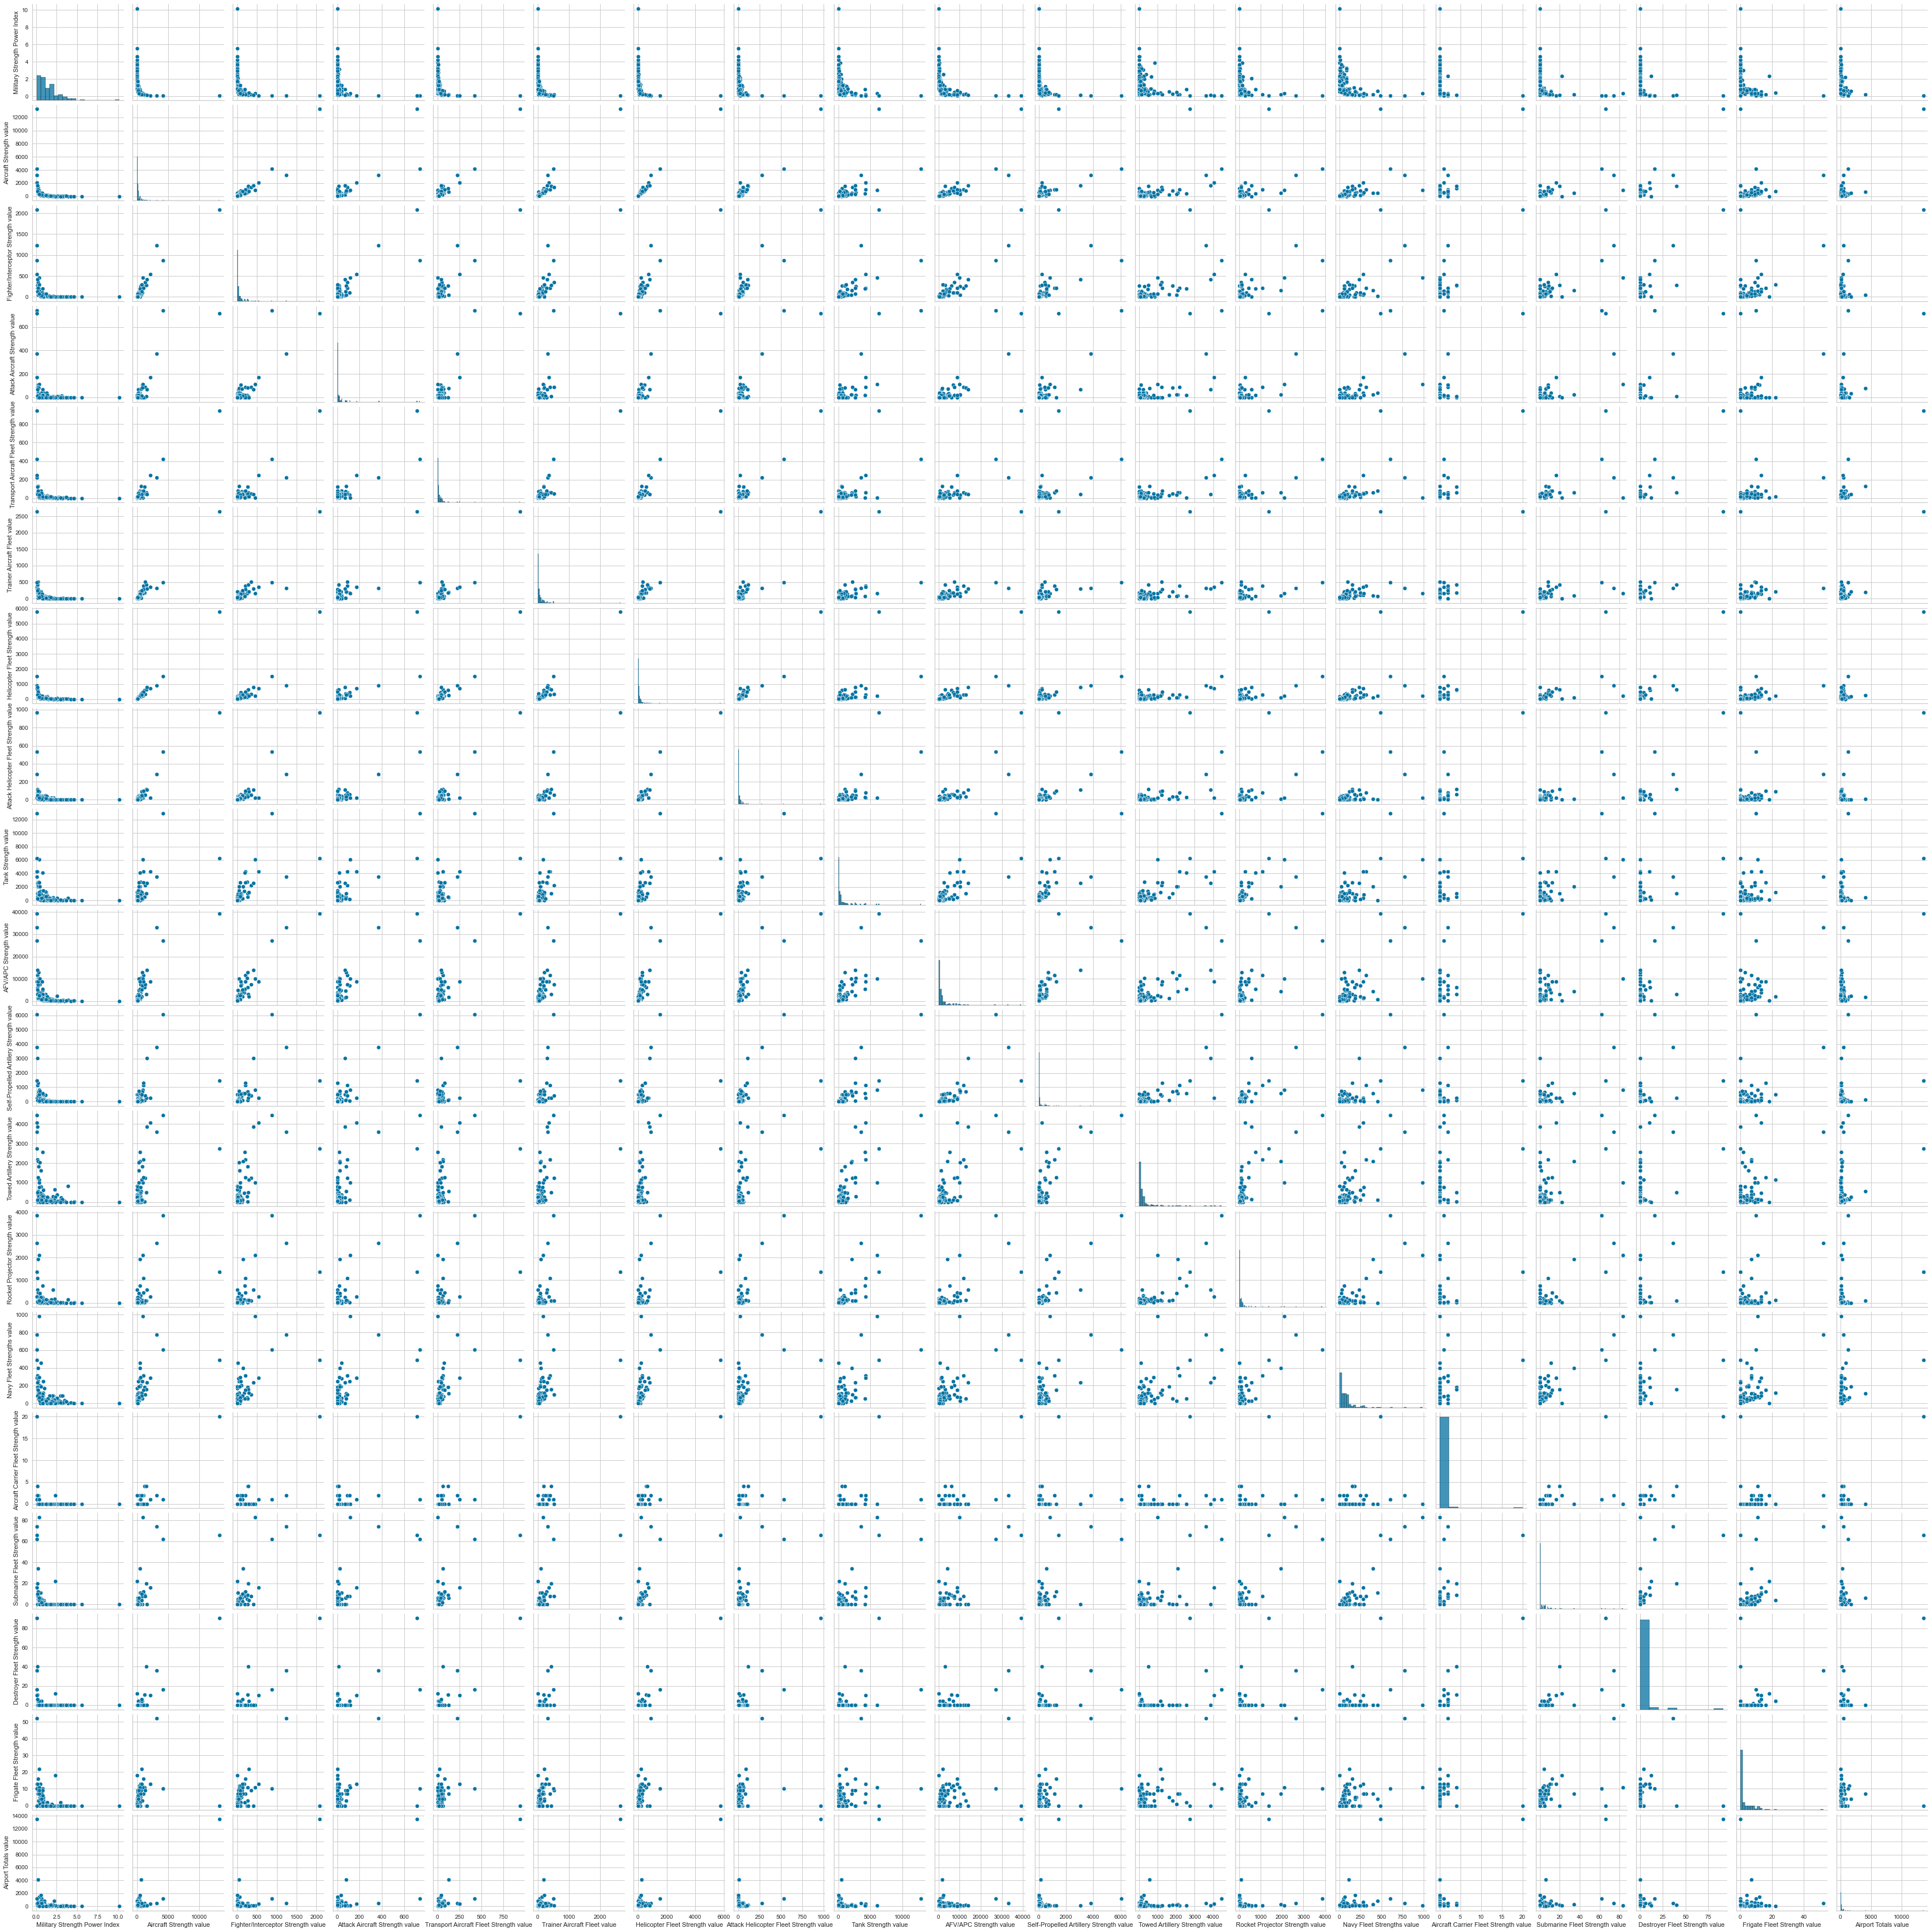

In [224]:
sns.pairplot(df)
plt.show()

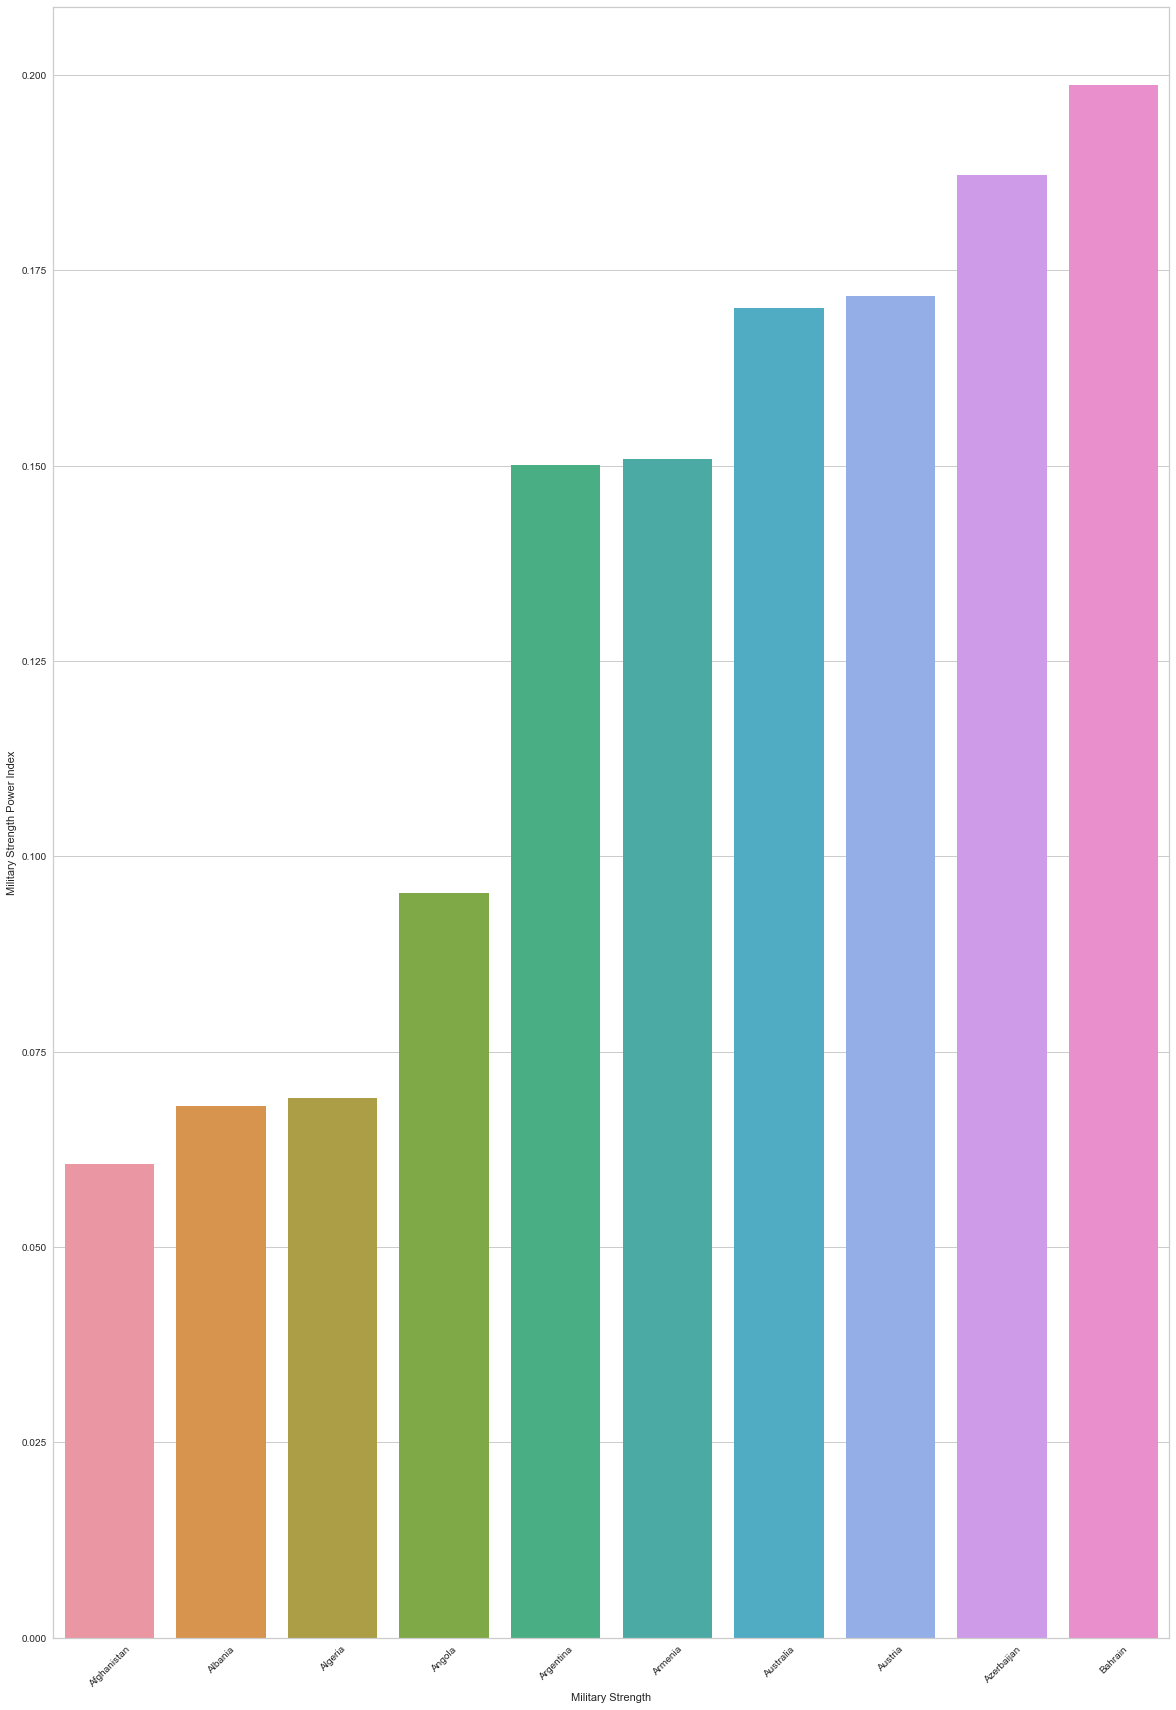

In [225]:
plt.figure(figsize = (20,30))
sns.barplot(x = df["Military Strength"][:10], y = "Military Strength Power Index", data = df,  order = df['Military Strength Power Index'].values.sort())
plt.xticks(rotation = 45);

In [226]:
df["Military Strength"].sort_values(ascending=False).head()

138     Zimbabwe
137       Zambia
136        Yemen
135      Vietnam
134    Venezuela
Name: Military Strength, dtype: object

In [227]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
1,Afghanistan,0.061,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,...,0.000,0.000,12000000000,2840000000,43.000,0.000,5500.000,0.000,14325743,34940837
2,Albania,0.068,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,...,0.000,0.000,250000000,9505000000,4.000,16000.000,42500.000,168300000,1519438,3057220
3,Algeria,0.069,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,...,0.000,5.000,13000000000,6260000000,157.000,1306000,325000,12200000000,20741263,41657488
4,Angola,0.095,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,...,0.000,0.000,7000000000,42080000000,176.000,1666000,82300.000,8273000000,6244205,30355880
5,Argentina,0.150,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,...,4.000,0.000,4200000000,214900000000,1138.000,479400,685000,2185000000,20179430,44694198


In [228]:
df[df["Military Strength Power Index"]>10]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
138,Zimbabwe,10.168,90.000,10.000,0.000,14.000,38.000,28.000,6.000,42.000,...,0.000,0.000,100000000,9357000000,196.000,0.000,19500.000,0.000,5584086,14030368


In [229]:
df[df["Military Strength"]=="United States"]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
131,United States,3.443,13264.000,2085.000,715.000,945.000,2643.000,5768.000,967.000,6289.000,...,91.000,0.000,750000000000,17910000000000,13513.000,9352000,20000000,36520000000,144872845,329256465


In [230]:
df[df["Military Strength"]=="Zimbabwe"]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
138,Zimbabwe,10.168,90.000,10.000,0.000,14.000,38.000,28.000,6.000,42.000,...,0.000,0.000,100000000,9357000000,196.000,0.000,19500.000,0.000,5584086,14030368


In [231]:
df[df["Military Strength Power Index"]==0]

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value


## Decriptive statistics

In [232]:
df.describe()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,Airport Totals value
count,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000,138.000
mean,1.461,388.471,81.565,25.761,30.232,82.833,154.065,25.623,646.565,2485.696,212.159,393.978,156.935,84.984,0.319,4.000,1.710,2.935,290.043
std,1.324,1231.982,230.325,94.528,92.330,240.804,520.184,97.326,1515.464,5410.546,688.029,805.782,484.381,138.447,1.804,12.632,9.155,6.057,1212.967
min,0.061,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
25%,0.575,33.000,0.000,0.000,3.000,4.250,15.250,0.000,19.250,250.250,0.000,24.250,0.000,12.750,0.000,0.000,0.000,0.000,33.500
50%,1.034,111.000,17.000,0.000,9.000,26.000,44.000,2.000,153.000,734.500,23.000,108.000,24.000,48.000,0.000,0.000,0.000,0.000,68.000
75%,2.022,290.250,60.500,15.750,26.000,79.250,126.750,17.750,436.250,2000.000,97.250,296.500,99.750,84.984,0.000,2.000,0.000,4.000,150.750
max,10.168,13264.000,2085.000,742.000,945.000,2643.000,5768.000,967.000,12950.000,39253.000,6083.000,4465.000,3860.000,984.000,20.000,83.000,91.000,52.000,13513.000


almost in all colummns except Military Strength Power Index mean > std.. 
this means this dataset contains imbalanced data.
Some countries has got much more military power then others. We may think as an outliers.

# Data Preprocessing

In [233]:
labels = df["Military Strength"]

In [234]:
df.drop("Military Strength", axis=1, inplace=True)

In [235]:
X = df.copy()

In [236]:
X = X.astype('float')

In [237]:
X.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
1,0.061,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,...,0.000,0.000,12000000000.000,2840000000.000,43.000,0.000,5500.000,0.000,14325743.000,34940837.000
2,0.068,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,...,0.000,0.000,250000000.000,9505000000.000,4.000,16000.000,42500.000,168300000.000,1519438.000,3057220.000
3,0.069,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,...,0.000,5.000,13000000000.000,6260000000.000,157.000,1306000.000,325000.000,12200000000.000,20741263.000,41657488.000
4,0.095,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,...,0.000,0.000,7000000000.000,42080000000.000,176.000,1666000.000,82300.000,8273000000.000,6244205.000,30355880.000
5,0.150,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,...,4.000,0.000,4200000000.000,214900000000.000,1138.000,479400.000,685000.000,2185000000.000,20179430.000,44694198.000


In [238]:
X.shape

(138, 26)

## Scaling

In [239]:
from sklearn.preprocessing import StandardScaler

In [240]:
scaler = StandardScaler()

In [241]:
scaled_X = scaler.fit_transform(X)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [242]:
from pyclustertend import hopkins

In [243]:
X.shape

(138, 26)

In [244]:
hopkins(X, X.shape[0])

0.07173309408139371

In [245]:
hopkins(X, 138)

0.082165805135732

## Clustering with K-means

In [246]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)

In [247]:
K_means_model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 0, 0, 0])

In [248]:
K_means_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [249]:
K_means_model.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 0, 0, 0])

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [250]:
ssd = [] #sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_) # intertia: Distance from each sample to centroid of its cluster

Text(0.5, 1.0, 'elbow method')

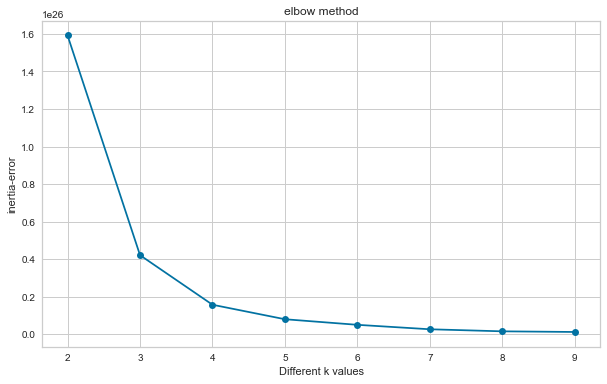

In [251]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

2 points might be my K value either 3 or 4

In [252]:
ssd # sum of squared distance

[1.591709282276745e+26,
 4.208693510098631e+25,
 1.5683101157453748e+25,
 7.956312589673094e+24,
 4.984308976164555e+24,
 2.6142676777381576e+24,
 1.5160985091134827e+24,
 1.1726889374325845e+24]

In [253]:
pd.Series(ssd).diff()

0                                NaN
1   -117083993126688212012498944.000
2    -26403833943532565417689088.000
3     -7726788567780654527283200.000
4     -2972003613508538908803072.000
5     -2370041298426397317922816.000
6     -1098169168624674848899072.000
7      -343409571680898246508544.000
dtype: float64

In [254]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,117083993126688212012498944.000
3,26403833943532565417689088.000
4,7726788567780654527283200.000
5,2972003613508538908803072.000
6,2370041298426397317922816.000
7,1098169168624674848899072.000
8,343409571680898246508544.000


<AxesSubplot:>

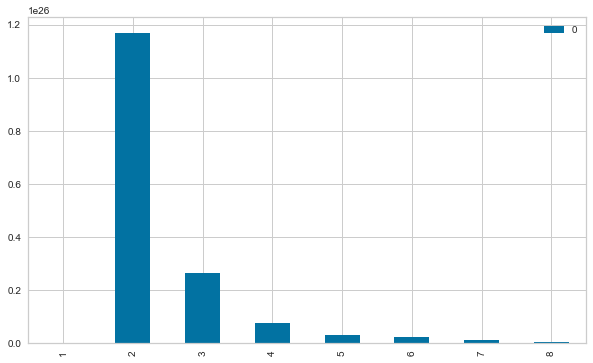

In [255]:
df_diff.plot(kind='bar')

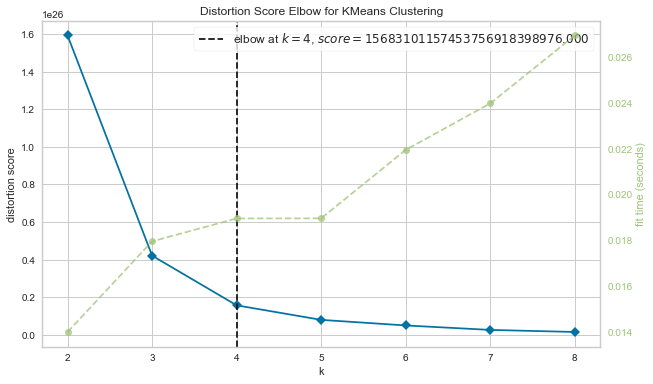

In [256]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

yellowbrick also suggests K=4

### Model Building and label visualisation

In [257]:
from sklearn.metrics import silhouette_score

In [258]:
silhouette_score(X, K_means_model.labels_)

0.8675195540884064

In [259]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.9227153206161361
For n_clusters=3, the silhouette score is 0.8995442950406763
For n_clusters=4, the silhouette score is 0.8671436271577667
For n_clusters=5, the silhouette score is 0.8675195540884064
For n_clusters=6, the silhouette score is 0.7789462746208773
For n_clusters=7, the silhouette score is 0.7817947547149927
For n_clusters=8, the silhouette score is 0.7847423624689158


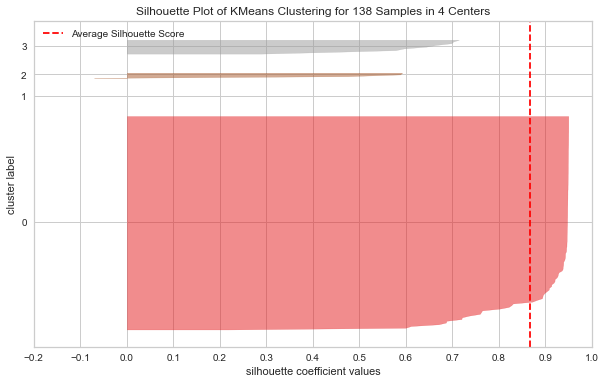

In [260]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model4 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

### Evaluate 

In [261]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0])

In [262]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0])

In [263]:
clusters = model.labels_

In [264]:
X["predicted_clusters"] = clusters

In [265]:
X

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,predicted_clusters
1,0.061,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,...,0.000,12000000000.000,2840000000.000,43.000,0.000,5500.000,0.000,14325743.000,34940837.000,0
2,0.068,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,...,0.000,250000000.000,9505000000.000,4.000,16000.000,42500.000,168300000.000,1519438.000,3057220.000,0
3,0.069,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,...,5.000,13000000000.000,6260000000.000,157.000,1306000.000,325000.000,12200000000.000,20741263.000,41657488.000,0
4,0.095,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,...,0.000,7000000000.000,42080000000.000,176.000,1666000.000,82300.000,8273000000.000,6244205.000,30355880.000,0
5,0.150,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,...,0.000,4200000000.000,214900000000.000,1138.000,479400.000,685000.000,2185000000.000,20179430.000,44694198.000,0
6,0.151,64.000,0.000,9.000,3.000,13.000,37.000,20.000,110.000,748.000,...,0.000,1385000000.000,10410000000.000,11.000,0.000,47500.000,0.000,1696085.000,3038217.000,0
7,0.170,464.000,82.000,6.000,38.000,174.000,133.000,22.000,59.000,3051.000,...,8.000,26300000000.000,1714000000000.000,480.000,263000.000,1005000.000,1821000000.000,10808002.000,23470145.000,0
8,0.172,120.000,15.000,0.000,11.000,32.000,62.000,0.000,56.000,467.000,...,0.000,3380000000.000,630800000000.000,52.000,14260.000,215000.000,43000000.000,4017691.000,8793370.000,0
9,0.187,147.000,17.000,12.000,1.000,29.000,88.000,17.000,570.000,1451.000,...,1.000,2805000000.000,17410000000.000,37.000,789300.000,180000.000,7000000000.000,5042346.000,10046516.000,0
10,0.199,109.000,17.000,0.000,2.000,37.000,65.000,22.000,180.000,843.000,...,1.000,1415000000.000,52150000000.000,4.000,45000.000,55000.000,124600000.000,806505.000,1422659.000,0


In [266]:
X["labels"] = labels

In [267]:
ct = pd.crosstab(X.predicted_clusters, X.labels)
ct
## confusion_matrix gibi bir parameter
##__crosstab__ fonksiyonu carpraz dogrulama yapar (Confusion Matrix ile ayni mantikta)


labels,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
predicted_clusters,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [272]:
df.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value
1,0.061,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,...,0.000,0.000,12000000000,2840000000,43.000,0.000,5500.000,0.000,14325743,34940837
2,0.068,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,...,0.000,0.000,250000000,9505000000,4.000,16000.000,42500.000,168300000,1519438,3057220
3,0.069,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,...,0.000,5.000,13000000000,6260000000,157.000,1306000,325000,12200000000,20741263,41657488
4,0.095,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,...,0.000,0.000,7000000000,42080000000,176.000,1666000,82300.000,8273000000,6244205,30355880
5,0.150,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,...,4.000,0.000,4200000000,214900000000,1138.000,479400,685000,2185000000,20179430,44694198


In [273]:
X.head()

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,predicted_clusters,labels
1,0.061,260.000,0.000,25.000,30.000,0.000,187.000,0.000,0.000,1062.000,...,12000000000.000,2840000000.000,43.000,0.000,5500.000,0.000,14325743.000,34940837.000,0,Afghanistan
2,0.068,19.000,0.000,0.000,0.000,0.000,19.000,0.000,0.000,467.000,...,250000000.000,9505000000.000,4.000,16000.000,42500.000,168300000.000,1519438.000,3057220.000,0,Albania
3,0.069,551.000,103.000,22.000,59.000,87.000,257.000,45.000,880.000,7361.000,...,13000000000.000,6260000000.000,157.000,1306000.000,325000.000,12200000000.000,20741263.000,41657488.000,0,Algeria
4,0.095,295.000,72.000,18.000,30.000,47.000,126.000,15.000,379.000,595.000,...,7000000000.000,42080000000.000,176.000,1666000.000,82300.000,8273000000.000,6244205.000,30355880.000,0,Angola
5,0.150,227.000,24.000,7.000,9.000,64.000,100.000,0.000,370.000,739.000,...,4200000000.000,214900000000.000,1138.000,479400.000,685000.000,2185000000.000,20179430.000,44694198.000,0,Argentina


## Hierarchical Clustering

In [274]:
df_scaled = scaler.fit_transform(df)

In [275]:
X = pd.DataFrame(df_scaled, columns=df.columns)

In [276]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [277]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

### Dendogram

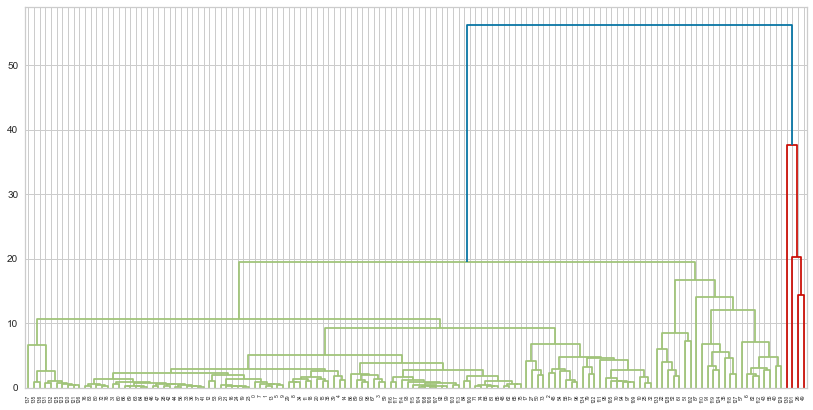

In [279]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 5);

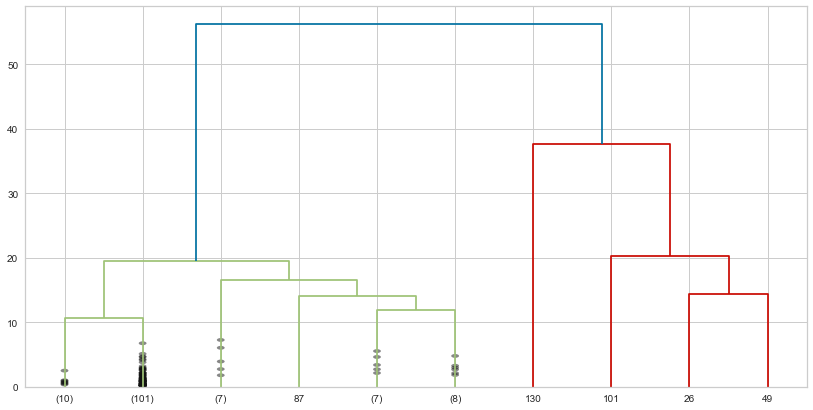

In [280]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

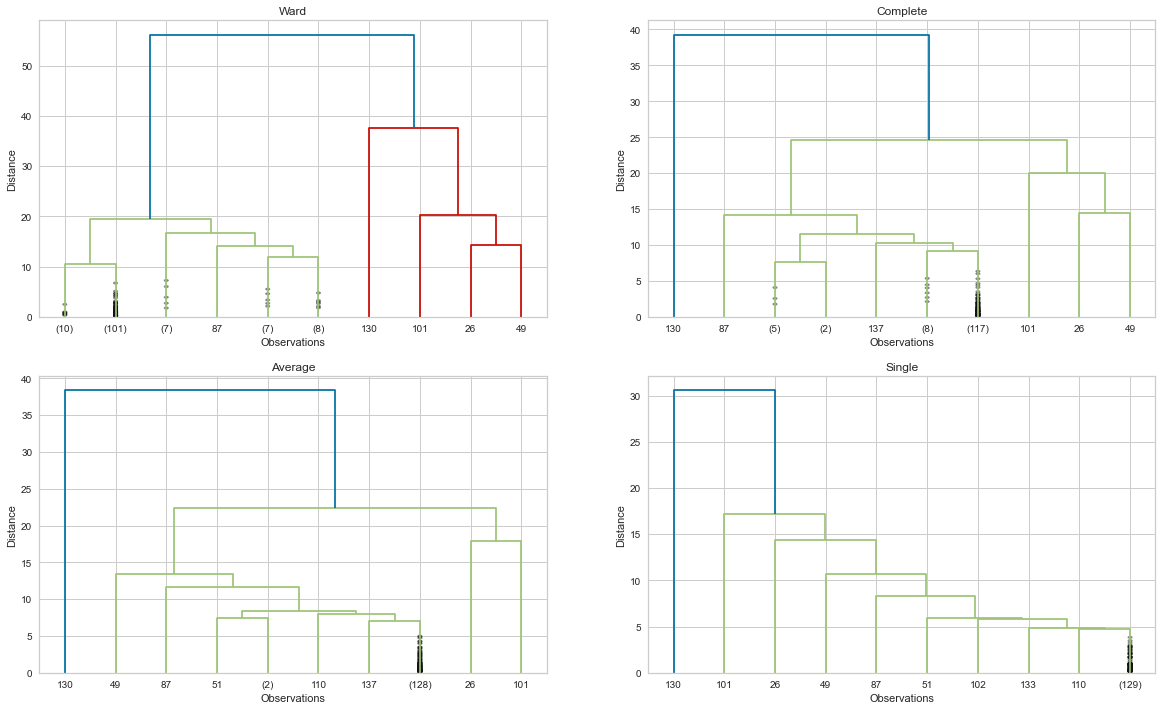

In [281]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

### Model Building and label visualisation

In [283]:
from sklearn.metrics import silhouette_score

In [284]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df, model.labels_)}')

Silhouette Score for 2 clusters: 0.8324653253314644
Silhouette Score for 3 clusters: 0.37023251406032515
Silhouette Score for 4 clusters: 0.04956545193398104
Silhouette Score for 5 clusters: 0.32814297661542324
Silhouette Score for 6 clusters: 0.30848571622373966
Silhouette Score for 7 clusters: 0.28747428399373315
Silhouette Score for 8 clusters: -0.7030168211853691
Silhouette Score for 9 clusters: -0.683518697497026
Silhouette Score for 10 clusters: -0.6564680880428138


In [293]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X)
X["cluster"] = clusters

In [294]:
clus_pred = X.groupby("cluster").mean().T
clus_pred

cluster,0,1,2
Military Strength Power Index,-0.286,-0.005,1.503
Aircraft Strength value,2.262,-0.129,10.489
Fighter/Interceptor Strength value,3.484,-0.143,8.730
Attack Aircraft Strength value,4.274,-0.150,7.318
Transport Aircraft Fleet Strength value,2.925,-0.140,9.944
Trainer Aircraft Fleet value,1.280,-0.108,10.670
Helicopter Fleet Strength value,1.732,-0.120,10.832
Attack Helicopter Fleet Strength value,2.606,-0.131,9.708
Tank Strength value,4.151,-0.121,3.737
AFV/APC Strength value,3.788,-0.136,6.820


In [297]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "complete")
clusters = final_model.fit_predict(scaled_X)

In [299]:
X["predicted_clusters"] = clusters
X["labels"] = labels
X

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,...,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster,predicted_clusters,labels
0,-1.061,-0.105,-0.355,-0.008,-0.003,-0.345,0.064,-0.264,-0.428,-0.264,...,-0.281,-0.204,-0.353,-0.322,-0.280,-0.132,-0.111,1,2,NaN
1,-1.056,-0.301,-0.355,-0.274,-0.329,-0.345,-0.261,-0.264,-0.428,-0.374,...,-0.277,-0.237,-0.343,-0.305,-0.276,-0.284,-0.305,1,2,Afghanistan
2,-1.055,0.132,0.093,-0.040,0.313,0.017,0.199,0.200,0.155,0.904,...,-0.279,-0.110,0.434,-0.174,0.006,-0.056,-0.070,1,2,Albania
3,-1.035,-0.076,-0.042,-0.082,-0.003,-0.149,-0.054,-0.110,-0.177,-0.351,...,-0.259,-0.094,0.650,-0.287,-0.086,-0.228,-0.139,1,2,Algeria
4,-0.993,-0.132,-0.251,-0.199,-0.231,-0.078,-0.104,-0.264,-0.183,-0.324,...,-0.165,0.702,-0.064,-0.008,-0.229,-0.063,-0.052,1,2,Angola
5,-0.993,-0.264,-0.355,-0.178,-0.296,-0.291,-0.226,-0.058,-0.355,-0.322,...,-0.277,-0.231,-0.353,-0.303,-0.280,-0.282,-0.305,1,2,Argentina
6,-0.978,0.062,0.002,-0.210,0.084,0.380,-0.041,-0.037,-0.389,0.105,...,0.649,0.157,-0.194,0.140,-0.238,-0.174,-0.181,1,2,Armenia
7,-0.977,-0.219,-0.290,-0.274,-0.209,-0.212,-0.178,-0.264,-0.391,-0.374,...,0.060,-0.197,-0.344,-0.225,-0.279,-0.254,-0.270,1,2,Australia
8,-0.965,-0.197,-0.281,-0.146,-0.318,-0.224,-0.127,-0.089,-0.051,-0.192,...,-0.273,-0.209,0.123,-0.242,-0.116,-0.242,-0.262,1,2,Austria
9,-0.957,-0.228,-0.281,-0.274,-0.307,-0.191,-0.172,-0.037,-0.309,-0.305,...,-0.254,-0.237,-0.325,-0.299,-0.277,-0.293,-0.315,1,2,Azerbaijan


In [300]:
X2_ct = pd.crosstab(X["predicted_clusters"], X["labels"])
X2_ct

labels,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia
predicted_clusters,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1


### Evaluate 